# Alanine Scanning with chargePlacer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from chargePlacer import *

Open PDB files for PksJ ACP4 and lysozyme.

In [2]:
acp4 = parse_coordinates('example/PksJACP4/ACP4_model.pdb')
lyso = parse_coordinates('example/Lysozyme/1aki.pdb')

Perform alanine scanning on ACP4 using the `alanine_scan` function. This will iterate through each mutable residue (i.e. not the N-terminus or C-terminus) and generate a minimised proton pattern for each. These are returned as a tuple containing: (0) a list of the mutated residue indices (to allow slicing with the parsed coordinate data), (1) an array with all of the proton patterns concatenated and (2) a list of tuples containing the energies of each mutant proton pattern.

In [3]:
acpm3_ala = alanine_scan(*acpm3[0:4], 8, coulomb_only=True)


HIS -29 A -> ALA...
Best Sequence
-------------
[1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1]
Coulomb energy = -1035.06 kJ/mol
Optimisation completed in 0.28 seconds after 11 shunts in a total of 3190 steps.

HIS -28 A -> ALA...
Best Sequence
-------------
[1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1]
Coulomb energy = -931.78 kJ/mol
Optimisation completed in 0.09 seconds after 9 shunts in a total of 2610 steps.

HIS -27 A -> ALA...
Best Sequence
-------------
[1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1]
Coulomb energy = -991.84 kJ/mol
Optimisation completed in 0.08 seconds after 8 shunts in a total of 2320 steps.

HIS -26 A -> ALA...
Best Sequence
-------------
[0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1]
Coulomb energy = -1029.51 kJ/mol
Optimisation completed in 0.08 seconds after 6 shunts in a total of 1740 steps.

HIS -25 A -> ALA...
Best Seq

Best Sequence
-------------
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1]
Coulomb energy = -706.98 kJ/mol
Optimisation completed in 0.10 seconds after 10 shunts in a total of 2900 steps.

ARG 97 A -> ALA...
Best Sequence
-------------
[0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1]
Coulomb energy = -600.03 kJ/mol
Optimisation completed in 0.11 seconds after 9 shunts in a total of 2610 steps.

ASP 100 A -> ALA...
Best Sequence
-------------
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1]
Coulomb energy = -1035.06 kJ/mol
Optimisation completed in 0.12 seconds after 10 shunts in a total of 3080 steps.


You can easily plot the mutant proton pattern array with `imshow`. *Hint*: modifying a colourmap to give a different colour for `NaN` values allows you to see highlight the mutated residue.

Text(0.5, 1.0, 'ACPM3$^{8+}$ alanine scanning protons')

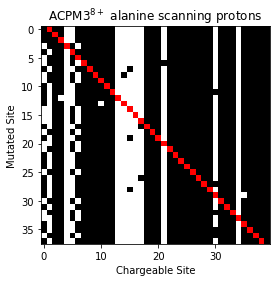

In [156]:
cmap = plt.cm.Greys
cmap.set_bad('red') # NaN values are 'bad'
plt.imshow(acpm3_ala[1], cmap=cmap)
plt.ylabel('Mutated Site')
plt.xlabel('Chargeable Site')
plt.title(r'ACPM3$^{8+}$ alanine scanning protons')

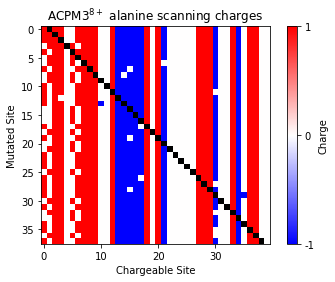

In [158]:
cmap = plt.cm.bwr
cmap.set_bad('black') # NaN values are 'bad'
plt.imshow(acpm3_ala[1]+acpm3[1], cmap=cmap)
plt.ylabel('Mutated Site')
plt.xlabel('Chargeable Site')
plt.title(r'ACPM3$^{8+}$ alanine scanning charges')
plt.colorbar(label='Charge', format='%.0f', ticks=[-1,0,1])

In [183]:
print('Resn\tEcoul')
print('---------------')
for r, res in enumerate(acpm3_ala[0]):
    print('{} {}\t{:.1f}'.format(acpm3[0][0][res], acpm3[0][1][res], acpm3_ala[2][r][0]))

Resn	Ecoul
---------------
HIS -29	-1035.1
HIS -28	-931.8
HIS -27	-991.8
HIS -26	-1029.5
HIS -25	-1035.1
HIS -24	-1029.5
ARG -17	-565.7
HIS -14	-695.2
ARG -2	-533.8
ASP 2	-1029.5
GLU 3	-1035.1
LYS 6	-530.9
ASP 8	-499.9
GLU 13	-777.6
ASP 20	-1004.2
GLU 24	-958.7
GLU 25	-911.3
ARG 27	-587.2
ASP 29	-1029.5
ARG 30	-834.2
GLU 31	-807.9
ASP 32	-1029.5
GLU 34	-1035.1
ASP 36	-1035.1
ASP 41	-1035.1
ASP 45	-1029.5
ARG 55	-573.8
ARG 58	-736.2
LYS 59	-588.1
GLU 61	-984.7
ASP 65	-1029.5
GLU 71	-1035.1
ARG 77	-674.3
ASP 80	-966.3
GLU 88	-1035.1
ARG 89	-707.0
ARG 97	-600.0
ASP 100	-1035.1


If we want to compare these proton patterns to the wildtype, we first generate a proton pattern for the wildtype (`acpm3_wt`) and then subtract this from the above array. If we plot this new array with a different colourmap, we can see that for many of the mutants there is little change in the overall proton pattern.

In [27]:
acpm3_wt = minimise_energy(*acpm3[1:4], 8, coulomb_only=True)

Best Sequence
-------------
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1]
Coulomb energy = -1035.06 kJ/mol
Optimisation completed in 0.30 seconds after 10 shunts in a total of 3190 steps.


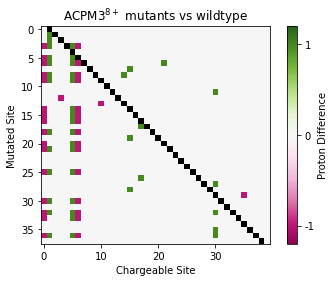

In [169]:
diff = acpm3_ala[1] - acpm3_wt[0] # 
cmap = plt.cm.PiYG
cmap.set_bad('black') # NaN values are 'bad'
plt.imshow(diff, cmap=cmap, vmin=-1.2, vmax=1.2)
plt.ylabel('Mutated Site')
plt.xlabel('Chargeable Site')
plt.title(r'ACPM3$^{8+}$ mutants vs wildtype')
plt.colorbar(label='Proton Difference', format='%.0f', ticks=[-1,0,1])

From the Benchmarking chargePlacer notebook, we know that ACPM3 generates two valid proton patterns, to account for both patterns we should perform a set of minimisations to get both patterns before subtracting whichever pattern generates the least deviation  compared to a mutant.

In [184]:
concat = np.zeros((10, len(acpm3[0][0])))
cenergy = []
for i in range(10):
    concat[i], cen = minimise_energy(*acpm3[1:4], 8, coulomb_only=True)[0:2]
    cenergy.append(cen)
uniq = np.unique(concat, axis=0, return_index=True)

Best Sequence
-------------
[0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1]
Coulomb energy = -1029.51 kJ/mol
Optimisation completed in 0.14 seconds after 6 shunts in a total of 1914 steps.
Best Sequence
-------------
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1]
Coulomb energy = -1035.06 kJ/mol
Optimisation completed in 0.11 seconds after 10 shunts in a total of 3190 steps.
Best Sequence
-------------
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1]
Coulomb energy = -1035.06 kJ/mol
Optimisation completed in 0.14 seconds after 11 shunts in a total of 3509 steps.
Best Sequence
-------------
[0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1]
Coulomb energy = -1029.51 kJ/mol
Optimisation completed in 0.10 seconds after 9 shunts in a total of 2871 steps.
Best Sequence
-------------
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1

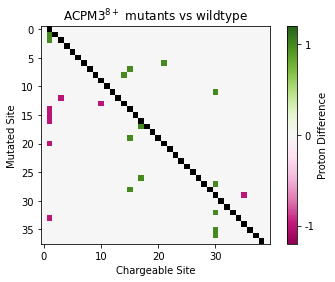

In [188]:
diff = np.zeros_like(acpm3_ala[1])
del_energy = []
for r, res in enumerate(acpm3_ala[0]):
    d1 = acpm3_ala[1][r] - uniq[0][0]
    d2 = acpm3_ala[1][r] - uniq[0][1]
    if np.count_nonzero(d1) < np.count_nonzero(d2):
        diff[r] = d1
        del_energy.append(float(acpm3_ala[2][r][0] - cenergy[uniq[1][0]]))
    else:
        diff[r] = d2
        del_energy.append(float(acpm3_ala[2][r][0] - cenergy[uniq[1][1]]))
cmap = plt.cm.PiYG
cmap.set_bad('black') # NaN values are 'bad'
plt.imshow(diff, cmap=cmap, vmin=-1.2, vmax=1.2)
plt.ylabel('Mutated Site')
plt.xlabel('Chargeable Site')
plt.title(r'ACPM3$^{8+}$ mutants vs wildtype')
plt.colorbar(label='Proton Difference', format='%.0f', ticks=[-1,0,1])

In [190]:
print('Residue \t +1 \t -1 \tΔEcoul')
print('---------------------------------------')
for r, res in enumerate(acpm3_ala[0]):
    prot = [str(n) for i, n in enumerate(acpm3[0][1]) if diff[r,i] == 1]
    deprot = [str(n) for i, n in enumerate(acpm3[0][1]) if diff[r,i] == -1]
    if prot or deprot:
        print('{} {}\t\t{}\t{}\t{:.1f}'.format(acpm3[0][0][res], acpm3[0][1][res], ' '.join(prot), ' '.join(deprot), del_energy[r]))

Residue 	 +1 	 -1 	ΔEcoul
---------------------------------------
HIS -28		-29		103.3
HIS -27		-29		43.2
ARG -17		31		463.8
HIS -14		20		339.9
ARG -2		13		495.7
LYS 6		61		504.2
ASP 8			-27	535.1
GLU 13			2	257.5
ASP 20			-29	25.4
GLU 24			-29	70.8
GLU 25			-29	118.2
ARG 27		25		447.9
ARG 30		20		200.9
GLU 31			-29	221.6
ARG 55		25		461.3
ARG 58		61		298.9
LYS 59		20		446.9
GLU 61			88	50.4
ARG 77		61		355.2
ASP 80			-29	63.2
ARG 89		61		328.1
ARG 97		61		429.5


## Lysozyme

In [160]:
lyso_ala = alanine_scan(*lyso[0:4], 8, coulomb_only=True)


LYS 1 A -> ALA...
Best Sequence
-------------
[1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0]
Coulomb energy = -589.25 kJ/mol
Optimisation completed in 0.22 seconds after 8 shunts in a total of 1440 steps.

ARG 5 A -> ALA...
Best Sequence
-------------
[1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0]
Coulomb energy = -863.31 kJ/mol
Optimisation completed in 0.06 seconds after 8 shunts in a total of 1440 steps.

GLU 7 A -> ALA...
Best Sequence
-------------
[1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0]
Coulomb energy = -433.64 kJ/mol
Optimisation completed in 0.04 seconds after 7 shunts in a total of 1309 steps.

LYS 13 A -> ALA...
Best Sequence
-------------
[1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0]
Coulomb energy = -547.80 kJ/mol
Optimisation completed in 0.04 seconds after 8 shunts in a total of 1440 steps.

ARG 14 A -> ALA...
Best Sequence
-------------
[1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0]
Coulomb energy = -839.57 

Text(0.5, 1.0, 'Lysozyme$^{8+}$ alanine scanning protons')

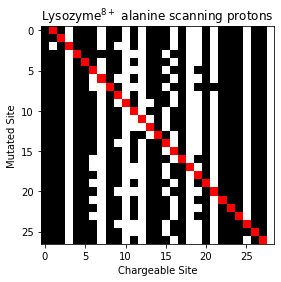

In [161]:
cmap = plt.cm.Greys
cmap.set_bad('red') # NaN values are 'bad'
plt.imshow(lyso_ala[1], cmap=cmap)
plt.ylabel('Mutated Site')
plt.xlabel('Chargeable Site')
plt.title(r'Lysozyme$^{8+}$ alanine scanning protons')

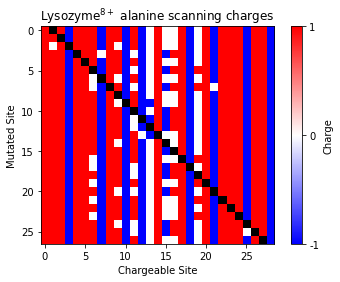

In [164]:
cmap = plt.cm.bwr
cmap.set_bad('black') # NaN values are 'bad'
plt.imshow(lyso_ala[1]+lyso[1], cmap=cmap)
plt.ylabel('Mutated Site')
plt.xlabel('Chargeable Site')
plt.title(r'Lysozyme$^{8+}$ alanine scanning charges')
plt.colorbar(label='Charge', format='%.0f', ticks=[-1,0,1])

In [182]:
print('Resn\tΔEcoul')
print('---------------')
for r, res in enumerate(lyso_ala[0]):
    print('{} {}\t{:.1f}'.format(lyso[0][0][res], lyso[0][1][res], lyso_ala[2][r][0]))

Resn	ΔEcoul
---------------
LYS 1	-589.3
ARG 5	-863.3
GLU 7	-433.6
LYS 13	-547.8
ARG 14	-839.6
HIS 15	-959.9
ASP 18	-644.6
ARG 21	-813.3
LYS 33	-913.3
GLU 35	-757.5
ARG 45	-961.3
ASP 48	-841.7
ASP 52	-961.3
ARG 61	-679.2
ASP 66	-913.3
ARG 68	-923.7
ARG 73	-735.2
ASP 87	-849.9
LYS 96	-961.3
LYS 97	-812.8
ASP 101	-852.0
ARG 112	-789.9
ARG 114	-819.3
LYS 116	-797.3
ASP 119	-543.9
ARG 125	-454.2
ARG 128	-657.4


In [167]:
lyso_wt = minimise_energy(*lyso[1:4], 8, coulomb_only=True)

Best Sequence
-------------
[1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0]
Coulomb energy = -961.27 kJ/mol
Optimisation completed in 0.22 seconds after 7 shunts in a total of 1386 steps.


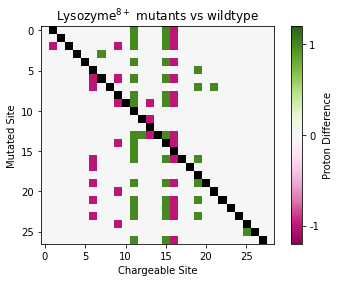

In [172]:
lyso_diff = lyso_ala[1] - lyso_wt[0] # 
cmap = plt.cm.PiYG
cmap.set_bad('black') # NaN values are 'bad'
plt.imshow(lyso_diff, cmap=cmap, vmin=-1.2, vmax=1.2)
plt.ylabel('Mutated Site')
plt.xlabel('Chargeable Site')
plt.title(r'Lysozyme$^{8+}$ mutants vs wildtype')
plt.colorbar(label='Proton Difference', format='%.0f', ticks=[-1,0,1])

In [180]:
print('Residue |+1 \t|-1 \t|Ecoul')
print('---------------------------------------')
for r, res in enumerate(lyso_ala[0]):
    prot = [str(n) for i, n in enumerate(lyso[0][1]) if lyso_diff[r,i] == 1]
    deprot = [str(n) for i, n in enumerate(lyso[0][1]) if lyso_diff[r,i] == -1]
    if prot or deprot:
        print('{} {}\t|{}\t|{}\t|{:.1f}'.format(lyso[0][0][res], lyso[0][1][res], ' '.join(prot), ' '.join(deprot), lyso_ala[2][r][0] - lyso_wt[2]))

Residue |+1 	|-1 	|Ecoul
---------------------------------------
LYS 1	|45 66	|68	|372.0
ARG 5	|45 66	|68	|98.0
GLU 7	|45 66	|1 33 68	|527.6
LYS 13	|18	|	|413.5
ARG 14	|45 66	|68	|121.7
HIS 15	|96	|	|1.3
ASP 18	|45 66	|15 33 68	|316.7
ARG 21	|96 101	|15	|148.0
LYS 33	|45 66	|68	|47.9
GLU 35	|45 66	|33 52 68	|203.7
ASP 48	|	|52	|119.5
ARG 61	|45 48 66	|52 68	|282.1
ASP 66	|45	|33 68	|47.9
ARG 68	|45	|	|37.6
ARG 73	|45 66 96	|15 68	|226.0
ASP 87	|	|15	|111.3
LYS 97	|45 66 96	|15 68	|148.5
ASP 101	|	|33	|109.2
ARG 112	|45 66 96	|15 68	|171.3
ARG 114	|45 66	|68	|142.0
LYS 116	|45 66 96	|15 68	|164.0
ASP 119	|	|33	|417.3
ARG 125	|119	|	|507.0
ARG 128	|45 66	|68	|303.9
